# Matrices de Transformación

Las matrices de rotación y traslación nos sirven para transformar una coordenada entre diferentes sistemas coordenados, pero tambien lo podemos ver, como la transformación que le hace cada eslabon a nuestro punto de ubicación.

Empecemos con la rotación:

$$
R_z =
\begin{pmatrix}
\cos{\theta} & -\sin{\theta} & 0 & 0 \\
\sin{\theta} & \cos{\theta} & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

La matriz que escribimos, girará nuestro de eje de coordenadas con respecto al eje $z$ un angulo $\theta$.

![Rotación en el eje Z](./imagenes/rotacion.svg)

Por cierto, las funciones trigonometricas toman como argumento el angulo en radianes, por lo que tomaré la convencion de llamar a $\tau = 2 \pi$, para definir los angulos como fracciones de la vuelta completa.

In [27]:
from math import pi, sin, cos
from numpy import matrix
from matplotlib.pyplot import figure, plot, style
style.use("ggplot")
%matplotlib inline

In [8]:
τ = 2*pi

Para empezar definiremos nuestra posición de inicio, como la coordenada:

$$
P_1 =
\begin{pmatrix}
1 \\
0 \\
0
\end{pmatrix}
$$

In [21]:
pos_1 = matrix([[1],
                [0],
                [0],
                [1]])

Agregamos un $1$ al final, debido a que  las matrices de transformación homogenea son de dimensión $\Re^{4\times 4}$ y de otra manera no concordarian las dimensiones. Ahora podemos graficar en el plano $XY$ de la siguiente manera:

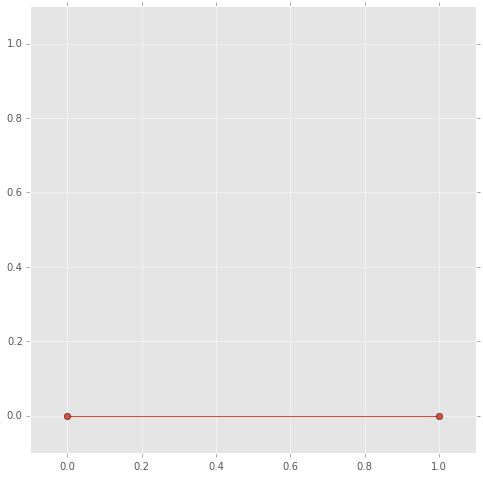

In [29]:
f1 = figure(figsize=(8, 8))
a1 = f1.gca()
a1.plot([0, pos_1[0]], [0, pos_1[1]], "-o")
a1.set_xlim(-0.1, 1.1)
a1.set_ylim(-0.1, 1.1);

Podemos definir matrices de la siguiente manera, y ver que el resultado es lo que esperariamos si quisieramos rotar el vector unitario $\hat{i}$ , con $30^o$ es decir $\frac{\tau}{12}$.

In [10]:
rot_1 = matrix([[cos(τ/12), -sin(τ/12), 0, 0],
              [sin(τ/12), cos(τ/12), 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])

rot_1*pos_1

matrix([[ 0.8660254],
        [ 0.5      ],
        [ 0.       ],
        [ 1.       ]])

Pero podemos hacer algo mejor, podemos definir una función que nos devuelva una matriz de rotación, dandole como argumento el angulo de rotación.

In [11]:
def rotacion_z(θ):
    A = matrix([[cos(θ), -sin(θ), 0, 0],
                [sin(θ), cos(θ), 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])
    return A

Entonces, tendremos el mismo resultado, con un codigo mas limpio.

In [31]:
rot_2 = rotacion_z(τ/12)
p = rot_2*pos_1
p

matrix([[ 0.8660254],
        [ 0.5      ],
        [ 0.       ],
        [ 1.       ]])

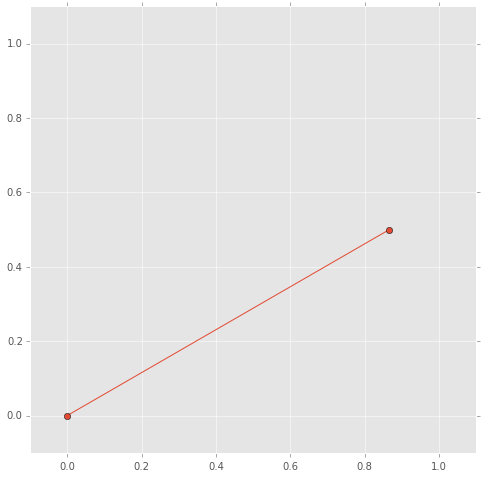

In [30]:
f1 = figure(figsize=(8, 8))
a1 = f1.gca()
a1.plot([0, p[0]], [0, p[1]], "-o")
a1.set_xlim(-0.1, 1.1)
a1.set_ylim(-0.1, 1.1);

# Ejercicio

1. Implemente el código para las funciones que devuelvan matrices de rotación en $x$ y $y$.
2. Implemente el código para las funciones que devuelvan matrices de traslación en $x$, $y$ y $z$.
3. Implemente una cadena cinemática que describa la transformación hecha por una rotacion en $z$ de $30^o$, una rotación en $y$ de $50^o$ y una traslación en $z$ de $1m$.
4. Sabemos que un pendulo doble puede ser descrito por una cadena cinemática, implemente una función que tome como argumento los parametros de rotación y traslación de cada uno de sus ejes, y devuelva la posición del actuador final.

## Notas

* Toma en cuenta que $R_x$ y $R_y$ son:

$$
R_x =
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & \cos{\theta} & -\sin{\theta} & 0 \\
0 & \sin{\theta} & \cos{\theta} & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

$$
R_y = 
\begin{pmatrix}
\cos{\theta} & 0 & \sin{\theta} & 0 \\
0 & 1 & 0 & 0 \\
-\sin{\theta} & 0 & \cos{\theta} & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$

* Las matrices de Traslación son muy faciles, un ejemplo es:

$$
T_x =
\begin{pmatrix}
1 & 0 & 0 & x \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$$